 ## Importing required librariers

In [49]:
from fastai.vision.all import *
from fastai.vision.widgets import *
import pandas as pd 
import numpy as np 

## Loading data and cleaning

In [50]:
labels = pd.read_csv('images.csv')

In [51]:
labels.head()

,image,sender_id,label,kids
0,4285fab0-751a-4b74-8e9b-43af05deee22,124,Not sure,False
1,ea7b6656-3f84-4eb3-9099-23e623fc1018,148,T-Shirt,False
2,00627a3f-0477-401c-95eb-92642cbe078d,94,Not sure,False
3,ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa,43,T-Shirt,False
4,3b86d877-2b9e-4c8b-a6a2-1d87513309d0,189,Shoes,False


Classes and their counts within the dataset

In [52]:
labels['label'].value_counts()

T-Shirt       1011
Longsleeve     699
Pants          692
Shoes          431
Shirt          378
Dress          357
Outwear        312
Shorts         308
Not sure       228
Hat            171
Skirt          155
Polo           120
Undershirt     118
Blazer         109
Hoodie         100
Body            69
Other           67
Top             43
Blouse          23
Skip            12
Name: label, dtype: int64

Replacing 'Not sure' with 'Not_sure'. 
Add suffix '.jpg' to all image files in the dataframe to open them within the model.
Merge the two lables 'label' and 'kids' into one column using space as a delimiter.
Keep only the images and their labels for the model to process.

In [53]:
labels.loc[labels['label']=='Not sure','label'] = 'Not_sure'
labels['image'] = labels['image'] + '.jpg'
labels['label_cat'] = labels['label'] + ' ' + labels['kids'].astype(str)
label_df = labels[['image', 'label_cat']]

## Data preprocessing

Functions that will be used to open the images and get the categories of the image for the DataBlock.

In [54]:
def get_x(r): return 'images_original/'+r['image']
def get_y(r): return r['label_cat'].split(' ')

Creating datablock

In [55]:
dblock = DataBlock(blocks = (ImageBlock, MultiCategoryBlock),
                  get_x = get_x, get_y = get_y,
                  item_tfms = RandomResizedCrop(128, min_scale=0.35))

dls = dblock.dataloaders(label_df)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


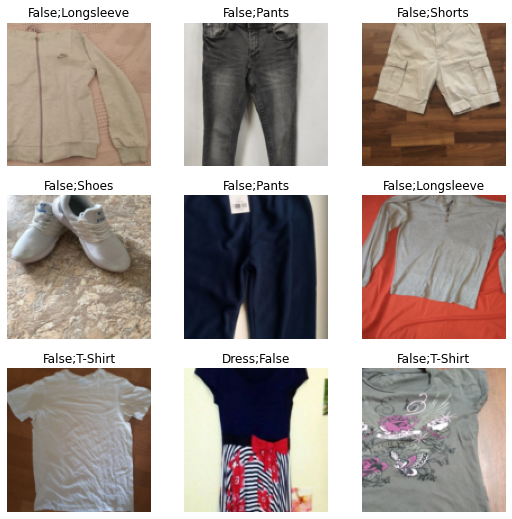

In [56]:
dls.show_batch(nrows=3, ncols=3)

## Learner 

In [ ]:
learn = vision_learner(dls, resnet18, metrics=partial(accuracy_multi, thresh=0.2))
learn.fine_tune(5, base_lr=3e-3)

C:\ProgramData\Anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.793360,0.346723,0.473443,13:23


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.326016,0.172919,0.889184,3:56:55


 Predictions and target variables

In [ ]:
preds,targs = learn.get_preds()

In [ ]:
xs = torch.linspace(0.01,0.99,50)
accs = [accuracy_multi(preds, targs, thresh=i, sigmoid=False) for i in xs]
plt.plot(xs,accs)